In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\manee\Downloads\archive (16)\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.rename(columns= {"Annual Income (k$)":"AnnualIncome","Spending Score (1-100)":"SpendingScore"}, inplace = True)

In [8]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


C:\Users\manee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


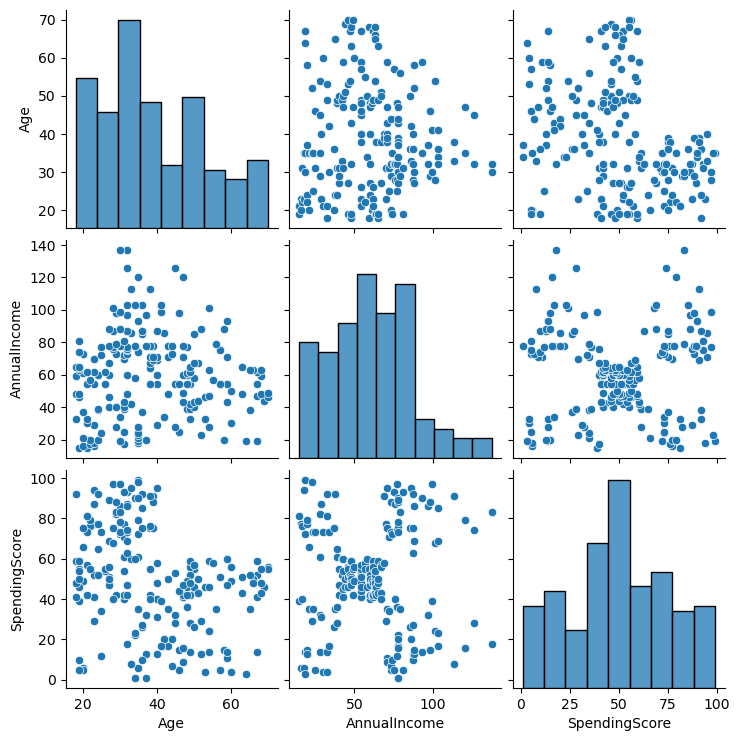

In [9]:
sns.pairplot(df[['Age','AnnualIncome','SpendingScore']])

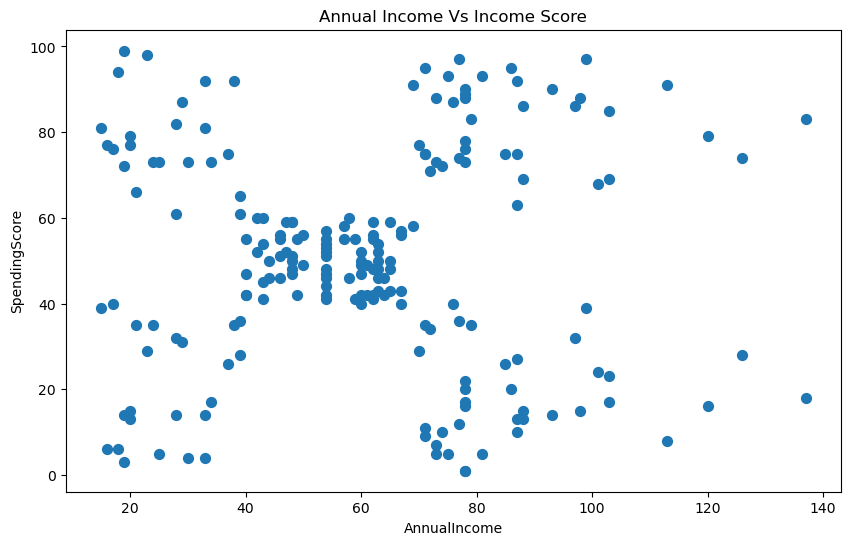

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(df['AnnualIncome'],df['SpendingScore'], s= 50)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('Annual Income Vs Income Score')
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [13]:
x = df[['AnnualIncome','SpendingScore']]
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10 , random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

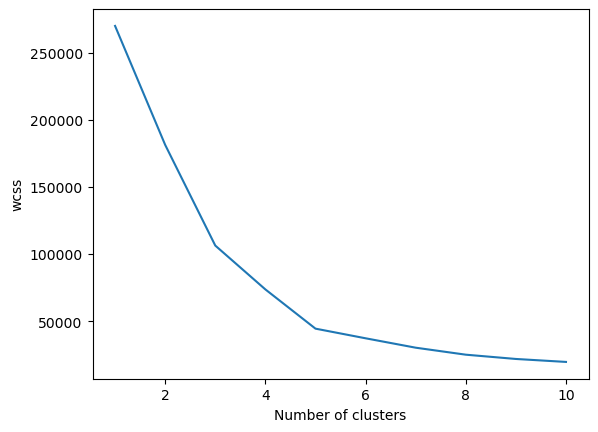

In [15]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')


In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init=10 , random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [17]:
df['Cluster'] = y_kmeans

In [18]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


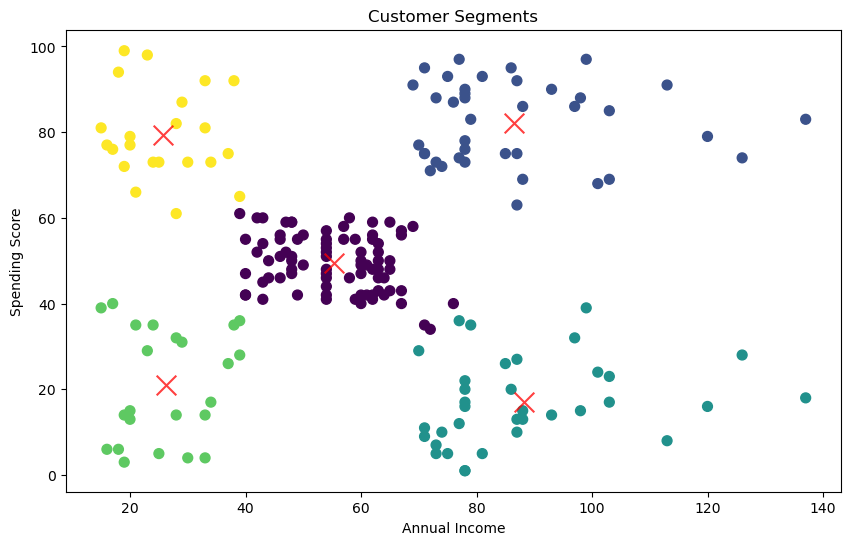

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = y_kmeans, s= 50, cmap= "viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha= 0.75, marker="x")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

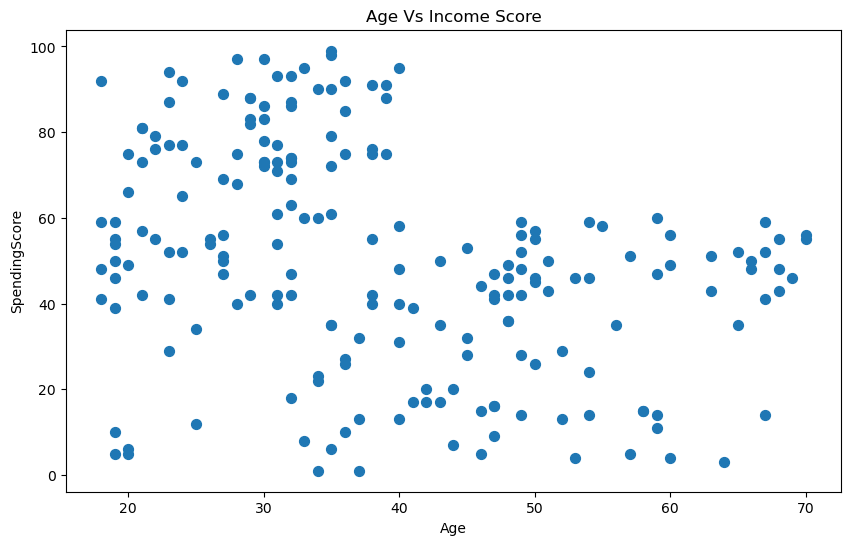

In [20]:
plt.figure(figsize = (10,6))
plt.scatter(df['Age'],df['SpendingScore'], s= 50)
plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.title('Age Vs Income Score')
plt.show()

In [21]:
x = df[['Age','SpendingScore']]
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10 , random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

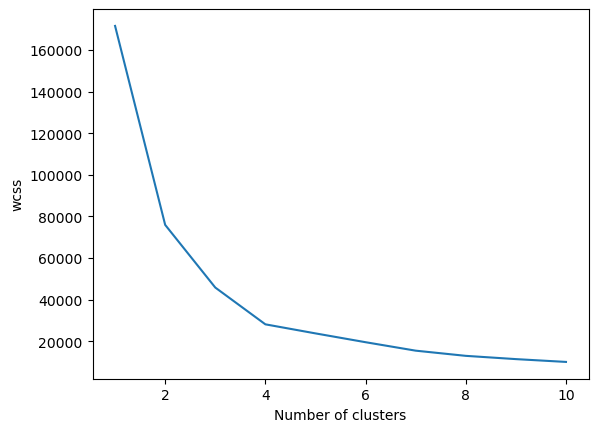

In [22]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')


In [23]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init=10 , random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [24]:
df['ClusterAge'] = y_kmeans

In [25]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,2,2
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,2,2


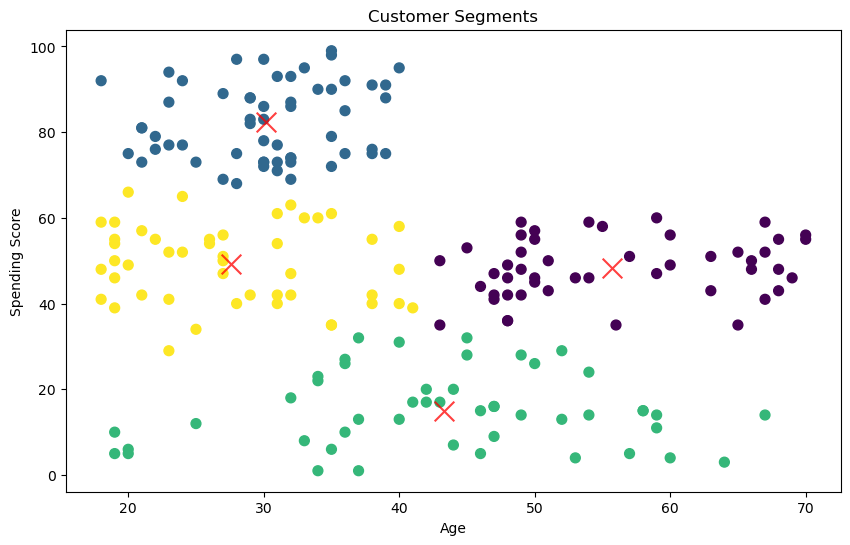

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = y_kmeans, s= 50, cmap= "viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha= 0.75, marker="x")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

In [27]:
x = df[['Age','AnnualIncome','SpendingScore']]
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10 , random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

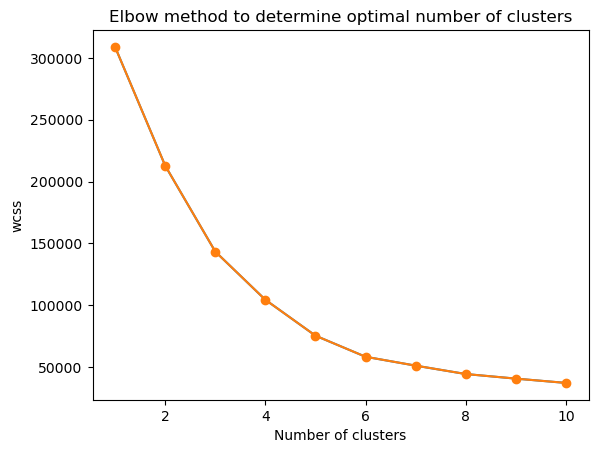

In [30]:
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('Elbow method to determine optimal number of clusters')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init=10 , random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [32]:
df['ClusterAgeIncomeSpend'] = y_kmeans

In [33]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge,ClusterAgeIncomeSpend
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,4,1,5
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,5
4,5,Female,31,17,40,3,3,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1,2
196,197,Female,45,126,28,2,2,1
197,198,Male,32,126,74,1,1,2
198,199,Male,32,137,18,2,2,1


In [34]:
from mpl_toolkits.mplot3d import Axes3D

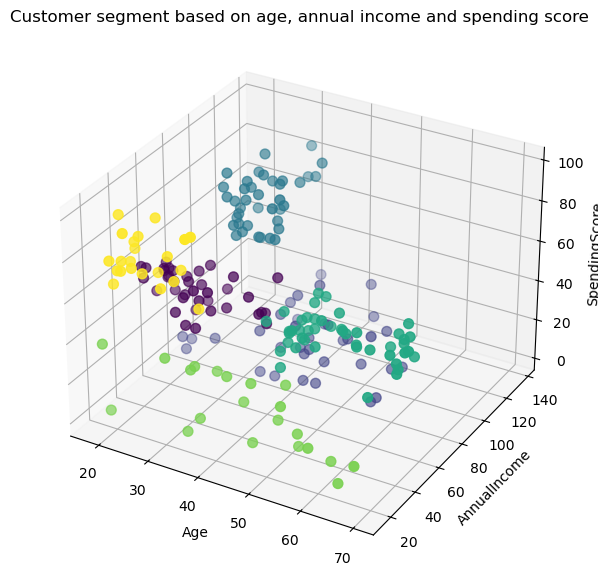

In [41]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Age'],df['AnnualIncome'],df['SpendingScore'], c= df['ClusterAgeIncomeSpend'], s=50, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('AnnualIncome')
ax.set_zlabel('SpendingScore')
plt.title('Customer segment based on age, annual income and spending score')
plt.show()
